In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.dpi"] = 250
plt.style.use('seaborn-notebook')
import matplotlib as mpl
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import ccxt
import exchange_poloniex

In [2]:
# exchange_poloniex.save_df(days_back = 90)

In [3]:
mdf = exchange_poloniex.load_df()
mdf.index = pd.DatetimeIndex(mdf.datetime)

In [4]:
print(mdf.shape)
mdf.head()

(8640, 8)


,Unnamed: 0,close,datetime,high,low,open,posix,volume
datetime,,,,,,,,
2017-09-29 22:00:00,0,11362.0,2017-09-29 22:00:00,11502.0,11361.0,11411.0,1.506744e+09,0.446677
2017-09-29 22:15:00,1,11406.0,2017-09-29 22:15:00,11521.0,11362.0,11439.0,1.506745e+09,1.426975
2017-09-29 22:30:00,2,11511.0,2017-09-29 22:30:00,11511.0,11510.0,11510.0,1.506746e+09,0.000825
2017-09-29 22:45:00,3,11554.0,2017-09-29 22:45:00,11600.0,11458.0,11510.0,1.506747e+09,1.028276
2017-09-29 23:00:00,4,11400.0,2017-09-29 23:00:00,11602.0,11299.0,11554.0,1.506748e+09,11.393033


In [5]:
# Check for missing time
i = 0
o = mdf['posix'][0]
for r in mdf['posix'][1:]:
    if r - o != 300:
        print(r, o)
        i += 1
    o = r
print(i, len(mdf))

1506744900.0 1506744000.0
1506745800.0 1506744900.0
1506746700.0 1506745800.0
1506747600.0 1506746700.0
1506748500.0 1506747600.0
1506749400.0 1506748500.0
1506750300.0 1506749400.0
1506751200.0 1506750300.0
1506752100.0 1506751200.0
1506753000.0 1506752100.0
1506753900.0 1506753000.0
1506754800.0 1506753900.0
1506755700.0 1506754800.0
1506756600.0 1506755700.0
1506757500.0 1506756600.0
1506758400.0 1506757500.0
1506759300.0 1506758400.0
1506760200.0 1506759300.0
1506761100.0 1506760200.0
1506762000.0 1506761100.0
1506762900.0 1506762000.0
1506763800.0 1506762900.0
1506764700.0 1506763800.0
1506765600.0 1506764700.0
1506766500.0 1506765600.0
1506767400.0 1506766500.0
1506768300.0 1506767400.0
1506769200.0 1506768300.0
1506770100.0 1506769200.0
1506771000.0 1506770100.0
1506771900.0 1506771000.0
1506772800.0 1506771900.0
1506773700.0 1506772800.0
1506774600.0 1506773700.0
1506775500.0 1506774600.0
1506776400.0 1506775500.0
1506777300.0 1506776400.0
1506778200.0 1506777300.0
1506779100.0

1507941900.0 1507941000.0
1507942800.0 1507941900.0
1507943700.0 1507942800.0
1507944600.0 1507943700.0
1507945500.0 1507944600.0
1507946400.0 1507945500.0
1507947300.0 1507946400.0
1507948200.0 1507947300.0
1507949100.0 1507948200.0
1507950000.0 1507949100.0
1507950900.0 1507950000.0
1507951800.0 1507950900.0
1507952700.0 1507951800.0
1507953600.0 1507952700.0
1507954500.0 1507953600.0
1507955400.0 1507954500.0
1507956300.0 1507955400.0
1507957200.0 1507956300.0
1507958100.0 1507957200.0
1507959000.0 1507958100.0
1507959900.0 1507959000.0
1507960800.0 1507959900.0
1507961700.0 1507960800.0
1507962600.0 1507961700.0
1507963500.0 1507962600.0
1507964400.0 1507963500.0
1507965300.0 1507964400.0
1507966200.0 1507965300.0
1507967100.0 1507966200.0
1507968000.0 1507967100.0
1507968900.0 1507968000.0
1507969800.0 1507968900.0
1507970700.0 1507969800.0
1507971600.0 1507970700.0
1507972500.0 1507971600.0
1507973400.0 1507972500.0
1507974300.0 1507973400.0
1507975200.0 1507974300.0
1507976100.0

1509699600.0 1509698700.0
1509700500.0 1509699600.0
1509701400.0 1509700500.0
1509702300.0 1509701400.0
1509703200.0 1509702300.0
1509704100.0 1509703200.0
1509705000.0 1509704100.0
1509705900.0 1509705000.0
1509706800.0 1509705900.0
1509707700.0 1509706800.0
1509708600.0 1509707700.0
1509709500.0 1509708600.0
1509710400.0 1509709500.0
1509711300.0 1509710400.0
1509712200.0 1509711300.0
1509713100.0 1509712200.0
1509714000.0 1509713100.0
1509714900.0 1509714000.0
1509715800.0 1509714900.0
1509716700.0 1509715800.0
1509717600.0 1509716700.0
1509718500.0 1509717600.0
1509719400.0 1509718500.0
1509720300.0 1509719400.0
1509721200.0 1509720300.0
1509722100.0 1509721200.0
1509723000.0 1509722100.0
1509723900.0 1509723000.0
1509724800.0 1509723900.0
1509725700.0 1509724800.0
1509726600.0 1509725700.0
1509727500.0 1509726600.0
1509728400.0 1509727500.0
1509729300.0 1509728400.0
1509730200.0 1509729300.0
1509731100.0 1509730200.0
1509732000.0 1509731100.0
1509732900.0 1509732000.0
1509733800.0

1511395200.0 1511394300.0
1511396100.0 1511395200.0
1511397000.0 1511396100.0
1511397900.0 1511397000.0
1511398800.0 1511397900.0
1511399700.0 1511398800.0
1511400600.0 1511399700.0
1511401500.0 1511400600.0
1511402400.0 1511401500.0
1511403300.0 1511402400.0
1511404200.0 1511403300.0
1511405100.0 1511404200.0
1511406000.0 1511405100.0
1511406900.0 1511406000.0
1511407800.0 1511406900.0
1511408700.0 1511407800.0
1511409600.0 1511408700.0
1511410500.0 1511409600.0
1511411400.0 1511410500.0
1511412300.0 1511411400.0
1511413200.0 1511412300.0
1511414100.0 1511413200.0
1511415000.0 1511414100.0
1511415900.0 1511415000.0
1511416800.0 1511415900.0
1511417700.0 1511416800.0
1511418600.0 1511417700.0
1511419500.0 1511418600.0
1511420400.0 1511419500.0
1511421300.0 1511420400.0
1511422200.0 1511421300.0
1511423100.0 1511422200.0
1511424000.0 1511423100.0
1511424900.0 1511424000.0
1511425800.0 1511424900.0
1511426700.0 1511425800.0
1511427600.0 1511426700.0
1511428500.0 1511427600.0
1511429400.0

1512951300.0 1512950400.0
1512952200.0 1512951300.0
1512953100.0 1512952200.0
1512954000.0 1512953100.0
1512954900.0 1512954000.0
1512955800.0 1512954900.0
1512956700.0 1512955800.0
1512957600.0 1512956700.0
1512958500.0 1512957600.0
1512959400.0 1512958500.0
1512960300.0 1512959400.0
1512961200.0 1512960300.0
1512962100.0 1512961200.0
1512963000.0 1512962100.0
1512963900.0 1512963000.0
1512964800.0 1512963900.0
1512965700.0 1512964800.0
1512966600.0 1512965700.0
1512967500.0 1512966600.0
1512968400.0 1512967500.0
1512969300.0 1512968400.0
1512970200.0 1512969300.0
1512971100.0 1512970200.0
1512972000.0 1512971100.0
1512972900.0 1512972000.0
1512973800.0 1512972900.0
1512974700.0 1512973800.0
1512975600.0 1512974700.0
1512976500.0 1512975600.0
1512977400.0 1512976500.0
1512978300.0 1512977400.0
1512979200.0 1512978300.0
1512980100.0 1512979200.0
1512981000.0 1512980100.0
1512981900.0 1512981000.0
1512982800.0 1512981900.0
1512983700.0 1512982800.0
1512984600.0 1512983700.0
1512985500.0

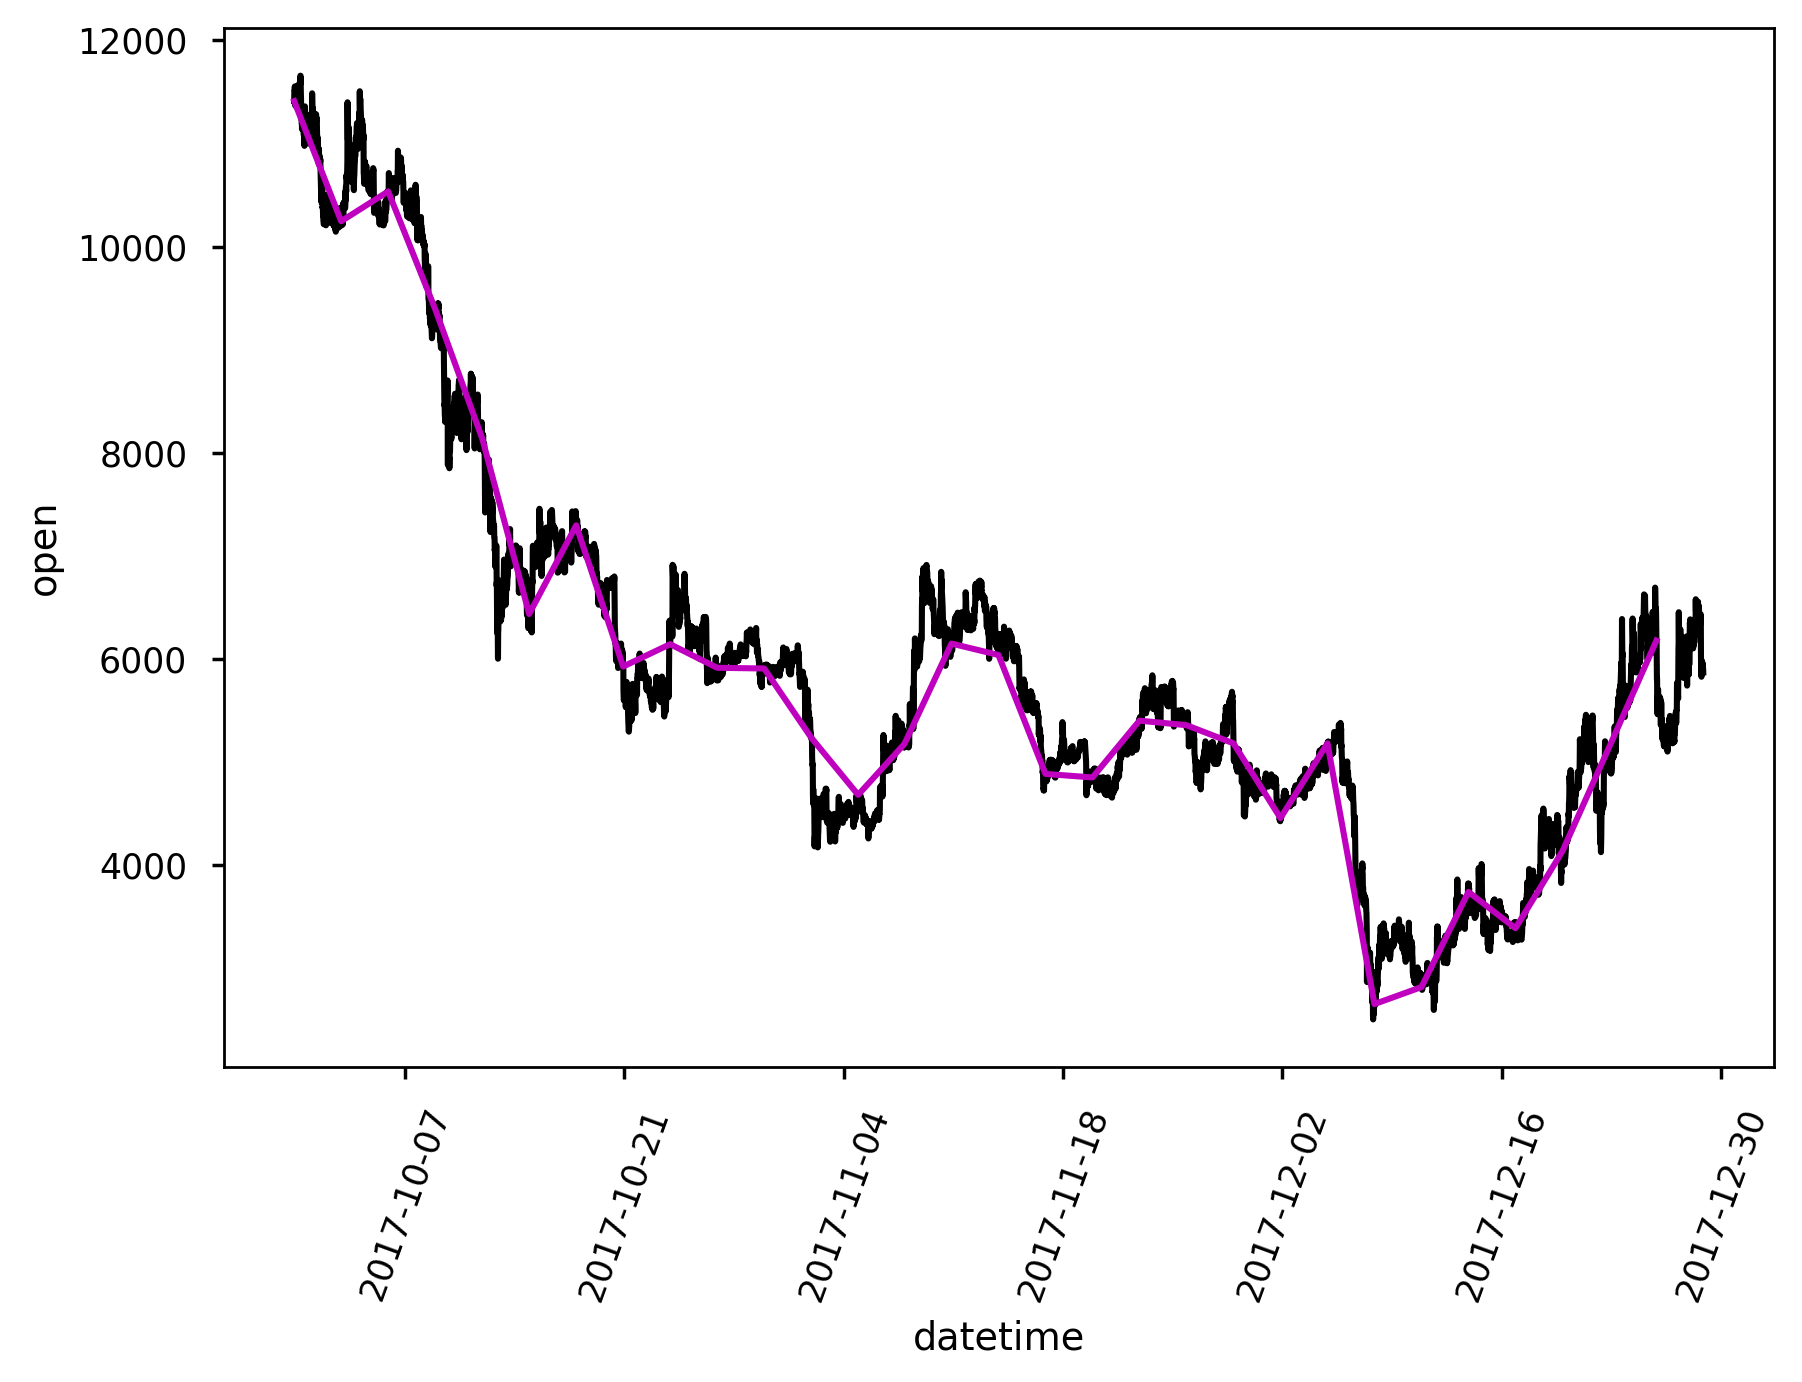

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(mdf.index, mdf.open, 'k-')
ax1.set_xlabel('datetime')
plt.xticks(rotation=70)
ax1.set_ylabel('open', color='k')
ax1.grid(False)

# ax2 = ax1
# ax2.plot(mdf.posix, mdf.close, 'b-')
# ax2.set_ylabel('satoshi', color='b')
# ax2.grid(False)
day_mdf = mdf[::288]
# ax2 = ax1.twinx()
ax1.plot(day_mdf.index, day_mdf.open, 'm-')
ax1.grid(False)


# fig.tight_layout()
plt.show()

In [7]:
testdf = mdf[['open']]
testdf.shape

(8640, 1)

In [8]:
from keras import callbacks
tbcallback = callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

Using TensorFlow backend.


Creating network
Epoch 1/50
6006/6006 [==============================] - 24s 4ms/step - loss: 0.0085
Epoch 2/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 3/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 4/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 5/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 6/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 7/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 8/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 9/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 10/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 11/50
6006/6006 [==============================] - 23s 4ms/step - loss: 0.0084
Epoch 12/50
6006/6006 [==============================] - 

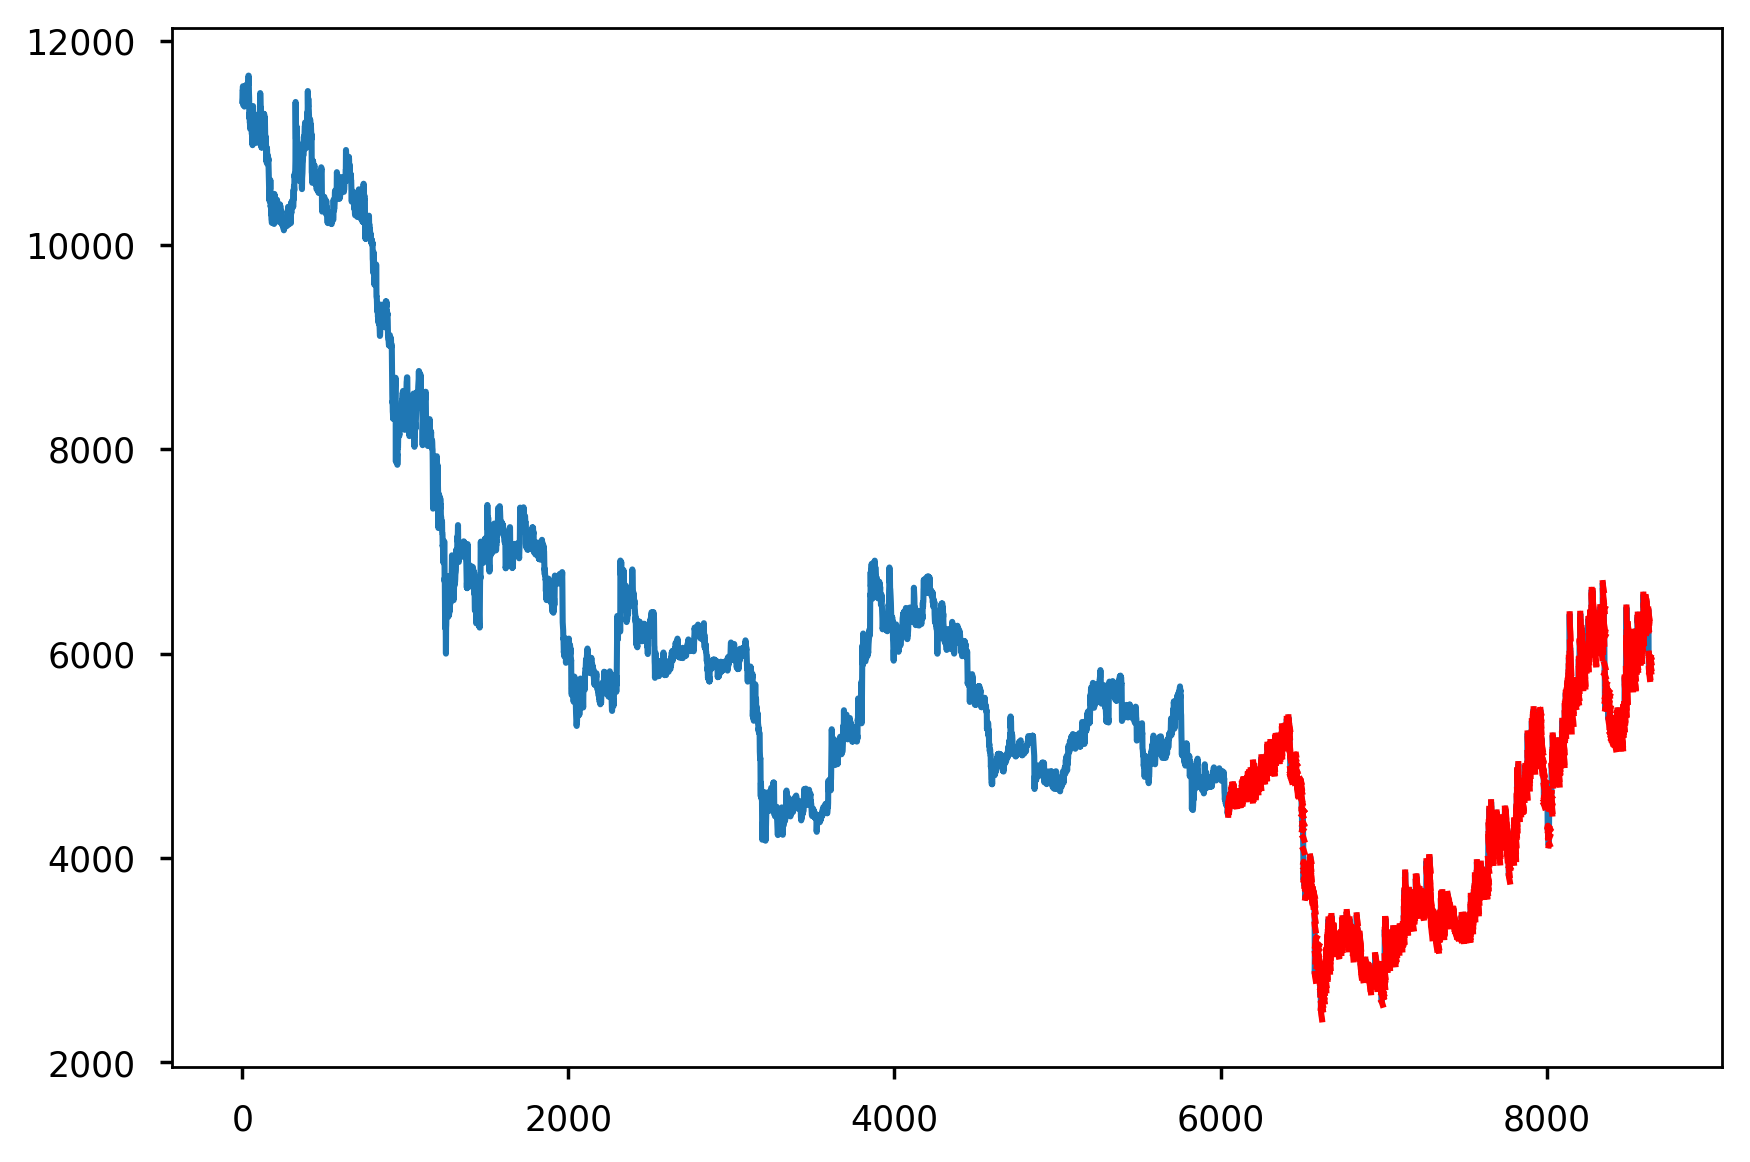

In [9]:
# inverse transform forecasts and testfrom pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
# from matplotlib import pyplot
from numpy import array

# date-time parsing function for loading the dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # design network
    print("Creating network")
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True, implementation = 2))
    model.add(Dense(y.shape[1]))
    model.add(Dense(y.shape[1]))
    model.add(Dense(y.shape[1]))
    model.add(Dense(y.shape[1]))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='nadam')
    # fit network
    model.fit(X, y, epochs=nb_epoch, batch_size=n_batch, verbose=1, shuffle=False, callbacks=[tbcallback])
#     for i in range(nb_epoch):
#         print("Training epoch", i)
#         model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
#         # make forecasts
#         forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
#         # inverse transform forecasts and test
#         forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
#         actual = [row[n_lag:] for row in test]
#         actual = inverse_transform(series, actual, scaler, n_test+2)
#         # evaluate forecasts
#         evaluate_forecasts(actual, forecasts, n_lag, n_seq)
#         model.reset_states()
    model.reset_states()
    return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag], test[i, n_lag:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
    # plot the entire dataset in blue
    plt.plot(series.values)
    # plot the forecasts in red
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        plt.plot(xaxis, yaxis, color='red')
    # show the plot
    plt.show()

# load dataset
series = testdf
# configure
n_lag = 36
n_seq = 6
n_test = int(len(series)*.3)
n_epochs = 50
n_batch = 1
n_neurons = 6
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [ ]:
subset = series[6006:]
# plot the entire dataset in blue
plt.plot(subset.values)
# plot the forecasts in red
for i in range(len(forecasts)):
    off_s = i - 1
    off_e = off_s + len(forecasts[i]) + 1
    xaxis = [x for x in range(off_s, off_e)]
    yaxis = [subset.values[off_s]] + forecasts[i]
    plt.plot(xaxis, yaxis, color='red')
# show the plot
plt.show()

In [ ]:
series[50]

In [ ]:
model.predict()